# RANDOM FOREST CLASSIFIER
Using Iris Dataset

Load the libraries

In [30]:
# Load the iris dataset
from sklearn.datasets import load_iris

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np

np.random.seed(0)

## Load & Visualize the data

In [31]:
# Create an object called iris with the iris data
iris = load_iris()

# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
# Add a new column with the species names, this is what we are going to try to predict
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Split the Data into tain and test Split
Create Training And Test Data

In [33]:
# Create a new column that for each row, generates a random number between 0 and 1, and
# if that value is less than or equal to .75, then sets the value of that cell as True
# and false otherwise. This is a quick and dirty way of randomly assigning some rows to
# be used as the training data and some as the test data.
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [34]:
# X=iris.data
# y=iris.target

# #we are going to divide half the data into training set to train our modal and rest into testing set
# from sklearn.cross_validation import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22)

In [35]:
# Create two new dataframes, one with the training rows, one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [36]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 118
Number of observations in the test data: 32


## Preprocess the Data

In [37]:
#list of features
features = iris['feature_names']

features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [38]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y = pd.factorize(train['species'])[0]

In [39]:
# view target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

## Create and Train the Model

In [40]:
# Create a random forest Classifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier 
#Input: training features and Output: y (the species)
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Predictions and Confidence
Predict values using test data and then view the predicted probabilities.

In [41]:
predictions = clf.predict(test[features])

predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [42]:
# Probabilities of 10 observations
clf.predict_proba(test[features])[0:10]

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.9, 0.1, 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ]])

There are three species of plant, thus [1., 0., 0.] tells us that the classifier is certain that the plant is the first class. Taking another example, [ 0.9, 0.1, 0. ] tells us that the classifier gives a 90% probability the plant belongs to the first class and a 10% probability the plant belongs to the second class. Because 90 is greater than 10, the classifier predicts the plant is the first class.

## Evaluate Classifier

In [43]:
# Create actual english names for the plants for each predicted plant class
preds = iris.target_names[predictions]

In [44]:
# View the PREDICTED species for the first five observations
preds[0:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

In [45]:
# View the ACTUAL species for the first five observations
test['species'].head()

7     setosa
8     setosa
10    setosa
13    setosa
17    setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

## Confusion Matrix
The columns are the species we predicted for the test data and the rows are the actual species for the test data.

In [46]:
# Create confusion matrix
pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


In [47]:
y_test = pd.factorize(test['species'])[0]
y_test.shape
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [48]:
predictions.shape
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [49]:
from sklearn import metrics

print (metrics.classification_report(y_test, predictions))
print (metrics.accuracy_score(y_test, predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      0.71      0.83         7
          2       0.86      1.00      0.92        12

avg / total       0.95      0.94      0.93        32

0.9375


13
13
sum 32

poorest performing class numbers:: [1]

Best performing class numbers:: [0]
module://ipykernel.pylab.backend_inline


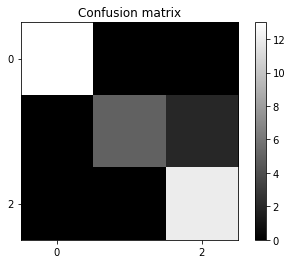

In [50]:
confusion = metrics.confusion_matrix(y_test, predictions,np.arange(3))

print (np.max(confusion))

diag = np.diag(confusion)

print (np.max(diag))

print ('sum', np.sum(confusion))
min_ind = diag.argsort()[:1]
print ('\npoorest performing class numbers::', min_ind)

max_ind = diag.argsort()[-1:]
print ('\nBest performing class numbers::', max_ind)

import matplotlib
import matplotlib.pyplot as plt

print(matplotlib.backends.backend)

plt.imshow(confusion, cmap='gray',vmax=13)
plt.colorbar()
class_numbers = np.arange(0,3,2)
plt.xticks(class_numbers)
plt.yticks(class_numbers)
plt.title('Confusion matrix')

plt.show()

## View feature Importance

In [51]:
# View a list of the features and their importance scores
for name, score in list(zip(train[features], clf.feature_importances_)):
    print(name,score)

sepal length (cm) 0.11185992930506346
sepal width (cm) 0.016341813006098178
petal length (cm) 0.36439533040889194
petal width (cm) 0.5074029272799464


Random Forests are very handy to get a quick understanding of what features
actually matter, in particular if you need to perform feature selection.